# Calculate limb-darkening coefficients

In this tutorial we walk through various options for calculating stellar limb-darkening coefficients. Let us start by importing the required packages and setting the path to the downloaded stellar data. In this tutorial we get the path from an enviroment variable, but you can simply set the path as a string.

In [1]:
import os
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from exotic_ld import StellarLimbDarkening


# "path/to/exotic_ld_data".
ld_data_path = os.environ["exotic_ld_data"]

First, instantiate the StellarLimbDarkening class. Here you must specify the stellar parameters and the stellar models. We have also set verbose=True to get some extra information about what is going on under the hood.

In [2]:
sld = StellarLimbDarkening(M_H=0.01, Teff=5512, logg=4.47, 
                           ld_model="mps1", 
                           ld_data_path=ld_data_path, 
                           interpolate_type="nearest",
                           verbose=True)

Input stellar parameters are M_H=0.01, Teff=5512, logg=4.47.
Loading stellar model from mps1 grid.
Matched nearest with M_H=0.0, Teff=5500, logg=4.5.
Stellar model loaded.


During instantiation stellar models are loaded based on your input stellar parameters. By default, the nearest matching model is located in the specified stellar grid. However, you may set interpolate_type="trilinear", and the stellar models will be linearly interpolated in each of the three parameter dimensions.

You can inspect the loaded stellar model using the following attributes.

(1221,)
(24,)
(1221, 24)


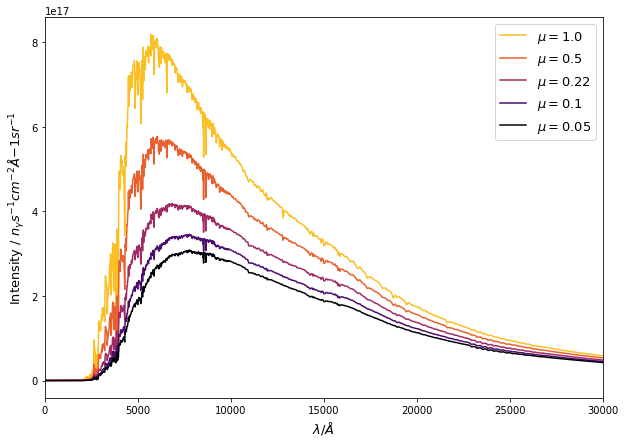

In [3]:
print(sld.stellar_wavelengths.shape)
print(sld.mus.shape)
print(sld.stellar_intensities.shape)

plt.figure(figsize=(10, 7))
for mu_idx in np.arange(0, sld.mus.shape[0], 5):
    plt.plot(sld.stellar_wavelengths, sld.stellar_intensities[:, mu_idx], 
             color=cm.inferno(0.85 - mu_idx/sld.mus.shape[0]), label="$\mu={}$".format(sld.mus[mu_idx]))
plt.xlabel("$\lambda / \AA$", fontsize=13)
plt.ylabel("Intensity / $n_{\gamma} s^{-1} cm^{-2} \AA{-1} sr^{-1}$", fontsize=13)
plt.xlim(0, 3e4)
plt.legend(loc="upper right", fontsize=13)
plt.show()

With the stellar model loaded, you can compute the stellar limb-darkening coefficients for the limb-darkening law of your choice. You simply have to specify the instrument mode and the wavelength range you require. You can also limit the range of $\mu$ values that are included in the fit.

In [4]:
us = sld.compute_4_parameter_non_linear_ld_coeffs(wavelength_range=[20000., 30000.], 
                                                  mode="JWST_NIRSpec_prism", 
                                                  mu_min=0.1)

Loading instrument mode=JWST_NIRSpec_prism with wavelength range 6000.0-53000.0 A.
Integrating I(mu) for wavelength limits of 20000.0-30000.0 A.
Integral done for I(mu).
Fitting limb-darkening law to 16 I(mu) data points where 0.1 <= mu <= 1.
Fit done, resulting coefficients are [ 0.49168688  0.13344898 -0.32763496  0.13151495].


Finally, you can inspect the fitted limb-darkening coefficients. To do this, you can find the integrated intensity profile in the attribute sld.I_mu, and the limb-darkening laws are all defined in the submodule, exotic_ld.ld_laws.

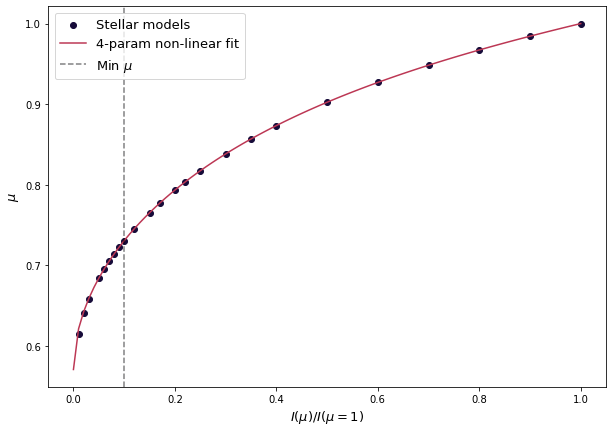

In [5]:
from exotic_ld.ld_laws import nonlinear_4param_ld_law


plt.figure(figsize=(10, 7))
plt.scatter(sld.mus, sld.I_mu, color=cm.inferno(0.1), label="Stellar models")
check_mus = np.linspace(0., 1., 100)
plt.plot(check_mus, nonlinear_4param_ld_law(check_mus, *us), 
         color=cm.inferno(0.5), label="4-param non-linear fit")
plt.axvline(0.1, ls="--", color=cm.inferno(0.), alpha=0.5, label="Min $\mu$")
plt.xlabel("$I(\mu) / I(\mu=1)$", fontsize=13)
plt.ylabel("$\mu$", fontsize=13)
plt.legend(loc="upper left", fontsize=13)
plt.show()

The returned tuple of limb-darkening coefficients, us, is now ready to be used in your analysis.